# Análise dos Algoritmos com Problemas Artificiais

### Definição de Blocos

Seja $x\in\{0,1\}^n$ uma cadeia binária de comprimento $n$, um bloco $b$ de $x$ é um elemento $b=(x_r,x_{r+1},...,x_{q})$ sendo $0\le i \le q \le n$.

Nos problemas a seguir, dada uma cadeia $x$ cosideraremos esta dividida em $k$ blocos, $b_1, b_2,...,b_k$ cada um de comprimento $\frac{n}{k}$. Isto é,
$$
b_i=(x_{(i-1)\frac{n}{k}+1},...,x_{i\frac{n}{k}}).
$$
Denotaremos $b_i[j]$ a $j$-ésima coordenada de $b_i$. Ou seja, $b_i[j]=x_{(i-1)\frac{n}{k}+1}\in\{0,1\}$.

## $m$-LOTZ (Leading Ones Trailing Zeros)

O problema $m$-LOTZ avalia duas características em cada bloco $b_i$ da cadeia $x\in\{0,1\}^n$: o número de 1s consecutivos no ínicio do bloco (Leading Ones, LO) e o número de 0s consecutivos no final do bloco (Trailing Zeros, TZ).

#### Definição $m$-LOTZ
Seja $x=(x_1,x_2,...,x_n)\in\{0,1\}^n$, definimos:
$$
m\text{-LOTZ}(x)=\big(f_1(x),f_2(x),...,f_k(x)\big)
$$
sendo
$$
f_k(x)=\begin{cases}
\sum_{i=1}^{2n/m}\prod_{j=1}^i x_{j+n(k-1)/m}, &\text{ se }k\text{ for ímpar,}\\
\sum_{i=1}^{2n/m}\prod_{j=i}^{2n/m}(1-x_{j+n(k-2)/m}), &\text{ se }k\text{ for par.}
\end{cases}
$$

#### Definição $m$-LOTZ utilizando blocos
Seja $m$ um inteiro positivo par. Definimos $k=m/2$ o número de blocos em que dividimos uma cadeia binária $x\in\{0,1\}^n$. Assim, definimos $m$ funções objetivos dadas por:
$$
f_{2i-1}(x)=\max\big\{j:b_i[q]=1,\forall q\in\{1,2,...,j\}\big\}
$$
$$
f_{2i}(x)=\max\big\{j:b_i[q]=0,\forall q\in\{j,j+1,...,n\}\big\}
$$ 
Isto é,
- $f_{2i-1}(x)$ retorna o número de 1s consecutivos no início de $b_i$.
- $f_{2i}(x)$ retorna o número de 0s consecutivos no final de $b_i$.

### Implementação do $m$-LOTZ

In [13]:
def m_lotz(x, m):
    """
    Calcula os objetivos do problema m-LOTZ para uma solução binária x.
    Args:
        x (list[int]): Cadeia binária de entrada.
        m (int): Número de objetivos (deve ser par).
    Returns:
        list[int]: Valores dos objetivos alternados LO e TZ.
    """
    assert len(x) % (m / 2) == 0, "O tamanho da cadeia deve ser divisível por m/2."
    block_size = len(x) // (m // 2)
    objectives = []
    
    for i in range(m // 2):
        block = x[i * block_size:(i + 1) * block_size]
        
        # Leading Ones (LO)
        lo = 0
        for bit in block:
            if bit == 1:
                lo += 1
            else:
                break  # Interrompe ao encontrar o primeiro 0
        
        # Trailing Zeros (TZ)
        tz = 0
        for bit in reversed(block):
            if bit == 0:
                tz += 1
            else:
                break  # Interrompe ao encontrar o primeiro 1
        
        objectives.extend([lo, tz])
    
    return objectives

## $m$-OMM (OneMax MinMax)

O problema $m-OMM$ avalia duas métricas em cada bloco $b_i$ da cadeia $x$. O número total de 1s (OneMax) e o número total de 0s (MinMax).

#### Definição
Fixado $m$ um inteiro positivo par. Definimos $k=m/2$ o número de blocos em que dividimos uma cadeia binária $x\in\{0,1\}^n$. Assim, definimos $m$ funções objetivos dadas por:
$$
f_{2i-1}(x)=\sum_{j=1}^{\frac{n}{k}}b_i[j]
$$
$$
f_{2i}(x)=\frac{n}{k}-\sum_{j=1}^{\frac{n}{k}}b_i[j].\\
$$ 
Isto é,
- $f_{2i-1}(x)$ retorna quantas vezes o 1s aparece no bloco $b_i$.
- $f_{2i}(x)$ retorna quantas vezes o 0 aparece no bloco $b_i$.

### Implementação do $m$-OMM

In [14]:
def m_omm(x, m):
    """
    Calcula os objetivos do problema m-OMM para uma solução binária x.
    Args:
        x (list[int]): Cadeia binária de entrada.
        m (int): Número de objetivos (deve ser par).
    Returns:
        list[int]: Valores dos objetivos alternados de maximizar 1s e minimizar 0s.
    """
    assert len(x) % (m / 2) == 0, "O tamanho da cadeia deve ser divisível por m/2."
    block_size = len(x) // (m // 2)
    objectives = []
    
    for i in range(m // 2):
        block = x[i * block_size:(i + 1) * block_size]
        max_ones = sum(block)  # Maximizar 1s
        min_zeros = len(block) - max_ones  # Minimizar 0s
        objectives.extend([max_ones, min_zeros])
    
    return objectives

## $m$-COCZ (Counting Ones Counting Zeros)

O problema $m-COCZ$ avalia a soma de 1s na primeira metade da cadeia $x$ e a soma de 0s na segunda metade.

#### Definição
Dado $x\in\{0,1\}^n$, dividimos $x$ em duas metades $x_L=(x_1,...,x_\frac{n}{2})$ e $x_R=(x_{\frac{n}{2}+1},...,x_n)$. Cada metade é dividida em $k$ blocos:
$$
b_i^{L} = (x_{(i-1) \cdot \frac{n}{2k} + 1}, \ldots, x_{i \cdot \frac{n}{2k}})
$$
$$
b_i^{R} = (x_{(i-1) \cdot \frac{n}{2k} + n/2 + 1}, \ldots, x_{i \cdot \frac{n}{2k} + n/2})
$$
Definimos as funções objetivos por:
$$
f_i(x) = \sum_{j=1}^{\frac{n}{2k}} b_i^{L}[j]
$$
$$
f_{k+i}(x) = \frac{n}{2k} - \sum_{j=1}^{\frac{n}{2k}} b_i^{R}[j]
$$
Ou seja:
- $f_i(x)$ é a soma de 1s no $i$-ésimo bloco da primeira metade.
- $f_{k+i}(x)$ é a soma de 0s no $i$-ésimo bloco da segunda metade.

### Implementação do $m$-COCZ

In [15]:
def m_cocz(x, m):
    """
    Calcula os objetivos do problema m-COCZ para uma solução binária x.
    Args:
        x (list[int]): Cadeia binária de entrada.
        m (int): Número de objetivos (deve ser par).
    Returns:
        list[int]: Valores dos objetivos para maximizar 1s na primeira metade e 0s na segunda metade.
    """
    assert len(x) % (m / 2) == 0, "O tamanho da cadeia deve ser divisível por m/2."
    half = len(x) // 2
    block_size = half // (m // 2)
    objectives = []
    
    # Primeira metade: Maximizar 1s
    for i in range(m // 2):
        block = x[i * block_size:(i + 1) * block_size]
        max_ones = sum(block)
        objectives.append(max_ones)
    
    # Segunda metade: Maximizar 0s
    for i in range(m // 2):
        block = x[half + i * block_size:half + (i + 1) * block_size]
        max_zeros = len(block) - sum(block)
        objectives.append(max_zeros)
    
    return objectives


### Comparação entre os Problemas

| Aspecto             | $m$-LOTZ                 | $m$-OMM                 | $m$-COCZ                 |
|---------------------|---------------------------|---------------------------|---------------------------|
| **Objetivo Primário** | Balancear LO e TZ em blocos | Alternar entre max 1s e min 0s | Separar 1s e 0s em metades |
| **Complexidade**     | Moderada                 | Alta                      | Alta                      |
| **Diversidade**      | Necessária               | Altamente necessária      | Altamente necessária      |
| **Fronteira de Pareto** | LO máximo e TZ máximo    | Alternância ótima         | Divisão perfeita de 1s e 0s |


## Teste das Implementações

In [16]:
# Cadeia binária de exemplo
x = [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
m = 2  # Número de objetivos

# Calculando os objetivos
print("m-LOTZ:", m_lotz(x, m))
print("m-OMM:", m_omm(x, m))
print("m-COCZ:", m_cocz(x, m))

m-LOTZ: [3, 2]
m-OMM: [5, 7]
m-COCZ: [4, 5]


In [17]:
# Cadeia binária de exemplo
x = [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
m = 4  # Número de objetivos

# Calculando os objetivos
print("m-LOTZ:", m_lotz(x, m))
print("m-OMM:", m_omm(x, m))
print("m-COCZ:", m_cocz(x, m))

m-LOTZ: [3, 0, 0, 2]
m-OMM: [4, 2, 1, 5]
m-COCZ: [3, 1, 3, 2]


In [18]:
# Cadeia binária de exemplo
x = [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
m = 8  # Número de objetivos

# Calculando os objetivos
print("m-LOTZ:", m_lotz(x, m))
print("m-OMM:", m_omm(x, m))
print("m-COCZ:", m_cocz(x, m))

m-LOTZ: [3, 0, 0, 0, 0, 3, 1, 2]
m-OMM: [3, 0, 1, 2, 0, 3, 1, 2]
m-COCZ: [1, 1, 1, 0, 1, 1, 1, 0]


Ainda em desenvolvimento...

In [19]:
import numpy as np
import random
from collections import defaultdict

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

def nsga3(pop_size, generations, bounds, objective_funcs, base_mutation_rate=0.1, divisions=4):
    """
    Implementação genérica do NSGA-III para diferentes problemas multiobjetivo.
    
    Args:
        pop_size (int): Tamanho da população.
        generations (int): Número de gerações.
        bounds (tuple): Limites do espaço de busca (min, max).
        objective_funcs (list[callable]): Lista de funções objetivo.
        base_mutation_rate (float): Taxa de mutação base.
        divisions (int): Número de divisões para gerar os pontos de referência.
    """
    # Número de objetivos
    M = len(objective_funcs)

    # Avaliação da população
    def evaluate_population(population):
        return [tuple(f(x) for f in objective_funcs) for x in population]

    # Dominância de Pareto
    def dominates(obj1, obj2):
        return all(x <= y for x, y in zip(obj1, obj2)) and any(x < y for x, y in zip(obj1, obj2))

    # Ordenação por não-dominância
    def fast_nondominated_sort(objectives):
        population_size = len(objectives)
        S = [[] for _ in range(population_size)]
        n = [0] * population_size
        rank = [0] * population_size
        fronts = [[]]

        for p in range(population_size):
            for q in range(population_size):
                if dominates(objectives[p], objectives[q]):
                    S[p].append(q)
                elif dominates(objectives[q], objectives[p]):
                    n[p] += 1
            if n[p] == 0:
                rank[p] = 0
                fronts[0].append(p)

        i = 0
        while fronts[i]:
            next_front = []
            for p in fronts[i]:
                for q in S[p]:
                    n[q] -= 1
                    if n[q] == 0:
                        rank[q] = i + 1
                        next_front.append(q)
            i += 1
            fronts.append(next_front)
        fronts.pop()
        return fronts

    # Gerar pontos de referência
    def generate_reference_points(M, p):
        def generate_recursive(points, num_objs, left, total, depth, current_point):
            if depth == num_objs - 1:
                current_point.append(left / total)
                points.append(current_point.copy())
                current_point.pop()
            else:
                for i in range(left + 1):
                    current_point.append(i / total)
                    generate_recursive(points, num_objs, left - i, total, depth + 1, current_point)
                    current_point.pop()
        points = []
        generate_recursive(points, M, p, p, 0, [])
        return np.array(points)

    # Seleção ambiental
    def environmental_selection(population, objectives, fronts, reference_points, pop_size):
        next_population_indices = []
        for front in fronts:
            if len(next_population_indices) + len(front) <= pop_size:
                next_population_indices.extend(front)
            else:
                N = pop_size - len(next_population_indices)
                selected_indices = niching_selection(front, objectives, reference_points, N)
                next_population_indices.extend(selected_indices)
                break
        next_population = [population[i] for i in next_population_indices]
        return next_population

    # Seleção por nicho
    def niching_selection(front, objectives, reference_points, N):
        selected = []
        objs = np.array([objectives[i] for i in front])
        ideal_point = np.min(objs, axis=0)
        normalized_objs = objs - ideal_point
        max_values = np.max(normalized_objs, axis=0)
        max_values[max_values == 0] = 1
        normalized_objs = normalized_objs / max_values
        associations = []
        for idx, obj in zip(front, normalized_objs):
            distances = np.linalg.norm(obj - reference_points, axis=1)
            min_index = np.argmin(distances)
            associations.append((idx, min_index, distances[min_index]))
        reference_associations = defaultdict(list)
        for idx, ref_idx, dist in associations:
            reference_associations[ref_idx].append((idx, dist))
        niche_counts = {i: 0 for i in range(len(reference_points))}
        selected_flags = {idx: False for idx in front}
        while len(selected) < N:
            min_niche_count = min(niche_counts.values())
            min_refs = [ref for ref, count in niche_counts.items() if count == min_niche_count]
            for ref_idx in min_refs:
                assoc_inds = reference_associations.get(ref_idx, [])
                unselected_inds = [(idx, dist) for idx, dist in assoc_inds if not selected_flags[idx]]
                if unselected_inds:
                    unselected_inds.sort(key=lambda x: x[1])
                    selected_idx = unselected_inds[0][0]
                    selected.append(selected_idx)
                    selected_flags[selected_idx] = True
                    niche_counts[ref_idx] += 1
                    break
            else:
                remaining = [idx for idx in front if not selected_flags[idx]]
                if remaining:
                    selected_idx = random.choice(remaining)
                    selected.append(selected_idx)
                    selected_flags[selected_idx] = True
                else:
                    break
        return selected[:N]

    # Torneio binário
    def tournament_selection(population, individual_ranks):
        i1, i2 = random.sample(range(len(population)), 2)
        rank1 = individual_ranks[i1]
        rank2 = individual_ranks[i2]
        if rank1 < rank2:
            return population[i1]
        elif rank2 < rank1:
            return population[i2]
        else:
            return population[random.choice([i1, i2])]

    # Crossover e mutação
    def crossover(parent1, parent2):
        w = random.uniform(0, 1)
        return w * parent1 + (1 - w) * parent2

    def mutation(individual, bounds, mutation_rate):
        if random.random() < mutation_rate:
            mutation_amount = random.uniform(-0.1, 0.1)
            individual += mutation_amount
            individual = np.clip(individual, bounds[0], bounds[1])
        return individual

    # Inicialização da população
    def initialize_population(size, bounds):
        return [random.uniform(bounds[0], bounds[1]) for _ in range(size)]

    population = initialize_population(pop_size, bounds)
    reference_points = generate_reference_points(M, divisions)

    # NSGA-III
    for gen in range(generations):
        objectives = evaluate_population(population)
        fronts = fast_nondominated_sort(objectives)
        individual_ranks = {idx: rank for rank, front in enumerate(fronts) for idx in front}
        offspring_population = []
        while len(offspring_population) < pop_size:
            parent1 = tournament_selection(population, individual_ranks)
            parent2 = tournament_selection(population, individual_ranks)
            child = crossover(parent1, parent2)
            mutation_rate = base_mutation_rate * (1 - gen / generations)
            child = mutation(child, bounds, mutation_rate)
            offspring_population.append(child)
        combined_population = population + offspring_population
        combined_objectives = evaluate_population(combined_population)
        combined_fronts = fast_nondominated_sort(combined_objectives)
        population = environmental_selection(combined_population, combined_objectives, combined_fronts, reference_points, pop_size)

    # Final
    objectives = evaluate_population(population)
    fronts = fast_nondominated_sort(objectives)
    pareto_front = [objectives[i] for i in fronts[0]]
    pareto_front.sort()
    return pareto_front

In [ ]:
import numpy as np
import random
from collections import defaultdict

# Função m_lotz
def m_lotz(x, m):
    assert len(x) % (m / 2) == 0, "O tamanho da cadeia deve ser divisível por m/2."
    block_size = len(x) // (m // 2)
    objectives = []
    for i in range(m // 2):
        block = x[i * block_size:(i + 1) * block_size]
        lo = sum(1 for bit in block if bit == 1)
        tz = sum(1 for bit in reversed(block) if bit == 0)
        objectives.extend([lo, tz])
    return objectives

# Função m_omm
def m_omm(x, m):
    assert len(x) % (m / 2) == 0, "O tamanho da cadeia deve ser divisível por m/2."
    block_size = len(x) // (m // 2)
    objectives = []
    for i in range(m // 2):
        block = x[i * block_size:(i + 1) * block_size]
        max_ones = sum(block)
        min_zeros = len(block) - max_ones
        objectives.extend([max_ones, min_zeros])
    return objectives

# Função m_cocz
def m_cocz(x, m):
    assert len(x) % (m / 2) == 0, "O tamanho da cadeia deve ser divisível por m/2."
    half = len(x) // 2
    block_size = half // (m // 2)
    objectives = []
    for i in range(m // 2):
        block = x[i * block_size:(i + 1) * block_size]
        max_ones = sum(block)
        objectives.append(max_ones)
    for i in range(m // 2):
        block = x[half + i * block_size:half + (i + 1) * block_size]
        max_zeros = len(block) - sum(block)
        objectives.append(max_zeros)
    return objectives

# Parâmetros
def binary_to_real(binary):
    return np.array(binary, dtype=float)

def real_to_binary(real):
    return np.round(real).astype(int)

# NSGA-III wrapper for binary optimization
def nsga3_wrapper(problem, m, n_bits, pop_size, generations):
    bounds = (0, 1)  # Binary space as continuous range
    objective_funcs = [lambda x, p=problem, m=m: p(real_to_binary(x), m)[i] for i in range(m)]
    
    def nsga3(pop_size, generations, bounds, objective_funcs, base_mutation_rate=0.1, divisions=4):
        M = len(objective_funcs)
        def evaluate_population(population):
            return [tuple(f(x) for f in objective_funcs) for x in population]
        def dominates(obj1, obj2):
            return all(x <= y for x, y in zip(obj1, obj2)) and any(x < y for x, y in zip(obj1, obj2))
        def fast_nondominated_sort(objectives):
            population_size = len(objectives)
            S = [[] for _ in range(population_size)]
            n = [0] * population_size
            rank = [0] * population_size
            fronts = [[]]
            for p in range(population_size):
                for q in range(population_size):
                    if dominates(objectives[p], objectives[q]):
                        S[p].append(q)
                    elif dominates(objectives[q], objectives[p]):
                        n[p] += 1
                if n[p] == 0:
                    rank[p] = 0
                    fronts[0].append(p)
            i = 0
            while fronts[i]:
                next_front = []
                for p in fronts[i]:
                    for q in S[p]:
                        n[q] -= 1
                        if n[q] == 0:
                            rank[q] = i + 1
                            next_front.append(q)
                i += 1
                fronts.append(next_front)
            fronts.pop()
            return fronts
        def generate_reference_points(M, p):
            def generate_recursive(points, num_objs, left, total, depth, current_point):
                if depth == num_objs - 1:
                    current_point.append(left / total)
                    points.append(current_point.copy())
                    current_point.pop()
                else:
                    for i in range(left + 1):
                        current_point.append(i / total)
                        generate_recursive(points, num_objs, left - i, total, depth + 1, current_point)
                        current_point.pop()
            points = []
            generate_recursive(points, M, p, p, 0, [])
            return np.array(points)
        def environmental_selection(population, objectives, fronts, reference_points, pop_size):
            next_population_indices = []
            for front in fronts:
                if len(next_population_indices) + len(front) <= pop_size:
                    next_population_indices.extend(front)
                else:
                    break
            next_population = [population[i] for i in next_population_indices]
            return next_population
        def initialize_population(size, bounds):
            return [np.random.uniform(bounds[0], bounds[1], n_bits) for _ in range(size)]
        population = initialize_population(pop_size, bounds)
        for _ in range(generations):
            objectives = evaluate_population(population)
            fronts = fast_nondominated_sort(objectives)
            population = environmental_selection(population, objectives, fronts, None, pop_size)
        objectives = evaluate_population(population)
        fronts = fast_nondominated_sort(objectives)
        pareto_front = [objectives[i] for i in fronts[0]]
        return pareto_front

    return nsga3(pop_size, generations, bounds, objective_funcs)

# Executando para cada problema
pareto_lotz = nsga3_wrapper(m_lotz, m=4, n_bits=16, pop_size=100, generations=100)
pareto_omm = nsga3_wrapper(m_omm, m=4, n_bits=16, pop_size=100, generations=100)
pareto_cocz = nsga3_wrapper(m_cocz, m=4, n_bits=16, pop_size=100, generations=100)

pareto_lotz, pareto_omm, pareto_cocz


([(1, 1, 1, 1), (1, 1, 1, 1), (1, 1, 1, 1)],
 [(1, 1, 1, 1), (1, 1, 1, 1), (1, 1, 1, 1), (1, 1, 1, 1)],
 [(0, 0, 0, 0),
  (0, 0, 0, 0),
  (0, 0, 0, 0),
  (0, 0, 0, 0),
  (0, 0, 0, 0),
  (0, 0, 0, 0),
  (0, 0, 0, 0),
  (0, 0, 0, 0),
  (0, 0, 0, 0),
  (0, 0, 0, 0),
  (0, 0, 0, 0),
  (0, 0, 0, 0)])

In [28]:
import time

# Função para executar o NSGA-III com marcação de tempo
def execute_with_timing(problem, m, n_bits, pop_size, generations):
    start_time = time.time()
    pareto = nsga3_wrapper(problem, m=m, n_bits=n_bits, pop_size=pop_size, generations=generations)
    elapsed_time = time.time() - start_time
    return pareto, elapsed_time

# Executando para cada problema com marcação de tempo
pareto_lotz, time_lotz = execute_with_timing(m_lotz, m=4, n_bits=128, pop_size=10, generations=10)
pareto_omm, time_omm = execute_with_timing(m_omm, m=4, n_bits=128, pop_size=10, generations=10)
pareto_cocz, time_cocz = execute_with_timing(m_cocz, m=4, n_bits=128, pop_size=10, generations=10)

pareto_lotz, time_lotz, pareto_omm, time_omm, pareto_cocz, time_cocz


([(24, 24, 24, 24)],
 0.11899900436401367,
 [(24, 24, 24, 24)],
 0.053999900817871094,
 [(12, 12, 12, 12)],
 0.029996395111083984)

# DTLZ2


In [2]:
import numpy as np

def dtlz2(x: np.ndarray, M: int = 6) -> np.ndarray:
    """
    DTLZ2 (minimização). x: (n,), n = M-1 + k, tipicamente k=10 -> n=15 p/ M=6.
    Retorna vetor de M objetivos.
    """
    x = np.asarray(x, dtype=float)
    n = x.size
    assert n >= M - 1, "DTLZ2: n deve ser >= M-1"

    k = n - (M - 1)
    g = np.sum((x[n - k:] - 0.5) ** 2)
    print(f"g={x[n - k:]}")

    f = np.empty(M, dtype=float)
    # produto de cossenos para os primeiros M-1 termos, sen no termo específico
    for m in range(M):
        print(f"m={m}")
        val = 1.0 + g
        # cos terms
        for i in range(M - m - 1):
            val *= np.cos(0.5 * np.pi * x[i])
        if m > 0:
            val *= np.sin(0.5 * np.pi * x[M - m - 1])
        f[m] = val
    return f  # todos minimização

def sample_dtlz2_initial_population(pop_size: int, M: int = 6, k: int = 10) -> np.ndarray:
    """
    Amostra população inicial uniforme em [0,1]^n.
    """
    n = (M - 1) + k
    return np.random.rand(pop_size, n)

# Exemplo de uso:
# pop = sample_dtlz2_initial_population(100, M=6, k=10)
# F = np.vstack([dtlz2(ind, M=6) for ind in pop])  # (100, 6)


In [3]:
dtlz2([1,2], 2)

g=[2.]
m=0
m=1


array([1.99005105e-16, 3.25000000e+00])

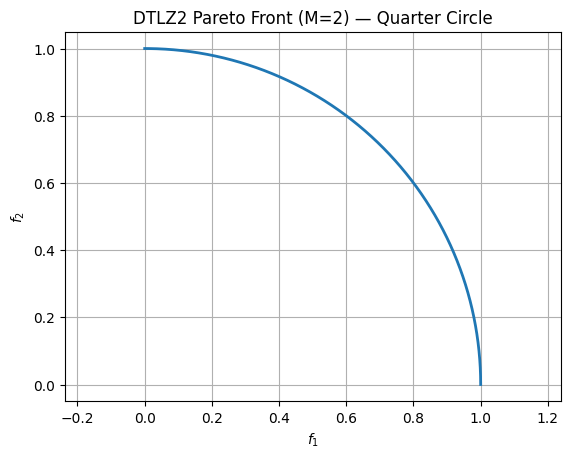

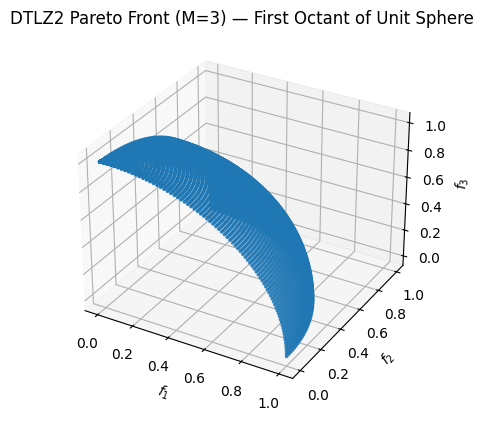

In [1]:
# DTLZ2 Pareto-front visualizations for M=2 and M=3
import numpy as np
import matplotlib.pyplot as plt

# ----- Helper: generate Pareto front for DTLZ2 -----
def pareto_front_dtlz2_m2(n_points: int = 1000):
    """
    DTLZ2 PF for M=2 lies on the unit quarter-circle:
    f1 = cos(theta), f2 = sin(theta), theta in [0, pi/2]
    """
    theta = np.linspace(0.0, np.pi/2, n_points)
    f1 = np.cos(theta)
    f2 = np.sin(theta)
    return f1, f2

def pareto_front_dtlz2_m3(n_theta: int = 60, n_phi: int = 60):
    """
    DTLZ2 PF for M=3 lies on the unit sphere's first octant:
    f1 = cos(theta) * cos(phi)
    f2 = cos(theta) * sin(phi)
    f3 = sin(theta)
    with theta, phi in [0, pi/2].
    """
    theta = np.linspace(0.0, np.pi/2, n_theta)
    phi   = np.linspace(0.0, np.pi/2, n_phi)
    T, P  = np.meshgrid(theta, phi, indexing="ij")
    f1 = np.cos(T) * np.cos(P)
    f2 = np.cos(T) * np.sin(P)
    f3 = np.sin(T)
    return f1.ravel(), f2.ravel(), f3.ravel()

# ----- Plot M=2 -----
f1_m2, f2_m2 = pareto_front_dtlz2_m2(1000)
plt.figure()
plt.plot(f1_m2, f2_m2, linewidth=2)
plt.title("DTLZ2 Pareto Front (M=2) — Quarter Circle")
plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.axis("equal")
plt.grid(True)
plt.show()

# ----- Plot M=3 -----
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D projection)
f1_m3, f2_m3, f3_m3 = pareto_front_dtlz2_m3(80, 80)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(f1_m3, f2_m3, f3_m3, s=3, alpha=0.8)
ax.set_title("DTLZ2 Pareto Front (M=3) — First Octant of Unit Sphere")
ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
plt.show()
